# Example to show how to plot a 4d matrix in 2d as a histogram

This is a trivial "response matrix" format. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate the response matrix. 

 - Generate uniform distributions between $0\rightarrow x_{avg}$ and $0\rightarrow y_{avg}$, each with $n_{ev}$ events.  
 - Smear those values by $x_{res}$ and $y_{res}$. 
 - Create a 4-d list of values that gives an $n_{ev} \times 4$ `numpy` array. 

In [2]:
nev = 100000
xavg = 100.
yavg = 20.
xres = 20.
yres = 5.
gen2x = np.random.random(nev) * xavg
reco2x = np.random.randn(nev) * xres + gen2x
gen2y = np.random.random(nev) * yavg
reco2y = np.random.randn(nev) * yres + gen2y


gen2 = np.array( [gen2x,gen2y] ).T
reco2 = np.array( [reco2x,reco2y] ).T
r = np.array( [gen2x, gen2y, reco2x, reco2y] ).T

print(gen2.shape)
print(reco2.shape)
print(r.shape)

(100000, 2)
(100000, 2)
(100000, 4)


### Uncomment to print the entire list

(only do this for small `nev`). 

In [3]:
#for i in range(nev):
#    print( ' %6.2f %6.2f %6.2f %6.2f' % (gen2x[i], reco2x[i], gen2y[i], reco2y[i]) )

## Histogram the values 

The histogram will have $n_x$ bins in $x$ and $n_y$ bins in $y$. 

In [4]:
nx = 5
ny = 11
iedges=np.linspace(0,100, nx)
jedges=np.linspace(0, 20, ny)
bins = ( iedges,jedges,iedges,jedges )

Create the actual histogram. Returns the values and the edges. 

In [5]:
H, edges = np.histogramdd(r, bins=bins )
print(H.shape)
print(edges)



(4, 10, 4, 10)
[array([  0.,  25.,  50.,  75., 100.]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]), array([  0.,  25.,  50.,  75., 100.]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])]


## Now define the transformation of the indices. 

In [6]:
def transform(i,j,k,l, s1, s2):
    return [i * s1 + j, k * s2 + l]

## Transform the histogram from 4d to unroll to 2d for visualization purposes or to do unfolding

In [7]:
H2 = np.zeros(( (nx-1)*(ny-1),(nx-1)*(ny-1)))
for i in range(nx-1):
    for j in range(ny-1):
        for k in range(nx-1):
            for l in range(ny-1):
                x,y = transform(i,j,k,l,ny-1,ny-1)                
                H2[x][y] = H[i][j][k][l]

## Plot the 4-d histogram as a 2-d histogram

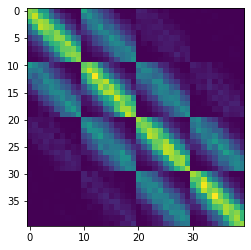

In [8]:
plt.imshow(H2)